In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

This scale cars model database contains eight tables with some information as below
- Customers: customer data
- Employees: all employee information
- Offices: sales office information
- Orders: customer's sales order
- OrderDetails: sales order line for each sales order
- Payments: customer's payment records
- Products: a list of scale model cars
- productLines: a list of products line catefories

In [9]:
# Create connection with database
cnn = sqlite3.connect('stores.db')

In [10]:
# To select number of attributes and rows as integer, and name tables as string
task1 = "SELECT 'customers' AS table_name, \
       13 AS number_of_attribute, \
       COUNT(*) AS number_of_row \
  FROM customers \
  \
UNION ALL \
\
SELECT 'products' AS table_name, \
       9 AS number_of_attribute, \
       COUNT(*) AS number_of_row \
  FROM products \
  \
UNION ALL \
\
SELECT 'productlines' AS table_name, \
       4 AS number_of_attribute, \
       COUNT(*) AS number_of_row \
  FROM productlines \
  \
UNION ALL \
\
SELECT 'orders' AS table_name, \
       7 AS number_of_attribute, \
       COUNT(*) AS number_of_row \
  FROM orders \
  \
UNION ALL \
\
SELECT 'orderdetails' AS table_name, \
       5 AS number_of_attribute, \
       COUNT(*) AS number_of_row \
  FROM orderdetails \
  \
UNION ALL \
\
SELECT 'payments' AS table_name, \
       4 AS number_of_attribute, \
       COUNT(*) AS number_of_row \
  FROM payments \
  \
UNION ALL \
\
SELECT 'employees' AS table_name, \
       8 AS number_of_attribute, \
       COUNT(*) AS number_of_row \
  FROM employees \
  \
UNION ALL \
\
SELECT 'offices' AS table_name, \
       9 AS number_of_attribute, \
       COUNT(*) AS number_of_row \
  FROM offices;"

result = pd.read_sql_query(task1, cnn)
# Display result
print(result)


     table_name  number_of_attribute  number_of_row
0     customers                   13            122
1      products                    9            110
2  productlines                    4              7
3        orders                    7            326
4  orderdetails                    5           2996
5      payments                    4            273
6     employees                    8             23
7       offices                    9              7


**** Q1: Which products should we order more or less of? ****

In [ ]:
# OD is orderdetails, P is products
# Compute low stock
lowstock = "SELECT productCode, \
       ROUND(SUM(quantityOrdered) * 1.0 / (SELECT quantityInStock \
                                          FROM products p \
                                          WHERE od.productCode = p.productCode), 2) AS low_stock \
  FROM orderdetails od \
 GROUP BY productCode \
 ORDER BY low_stock DESC \
 LIMIT 10;"

result = pd.read_sql_query(lowstock, cnn)

# Display result
print(result)

  productCode  low_stock
0    S24_2000      67.67
1    S12_1099      13.72
2    S32_4289       7.15
3    S32_1374       5.70
4    S72_3212       2.31
5   S700_3167       1.90
6    S50_4713       1.65
7    S18_2795       1.61
8    S18_2248       1.54
9   S700_1938       1.22


  productCode                           productName   productLine  \
0    S18_3232           1992 Ferrari 360 Spider red  Classic Cars   
1    S12_1108                     2001 Ferrari Enzo  Classic Cars   
2    S10_1949              1952 Alpine Renault 1300  Classic Cars   
3    S10_4698  2003 Harley-Davidson Eagle Drag Bike   Motorcycles   
4    S12_1099                     1968 Ford Mustang  Classic Cars   
5    S12_3891                      1969 Ford Falcon  Classic Cars   
6    S18_1662           1980s Black Hawk Helicopter        Planes   
7    S18_2238        1998 Chrysler Plymouth Prowler  Classic Cars   
8    S18_1749              1917 Grand Touring Sedan  Vintage Cars   
9    S12_2823                      2002 Suzuki XREO   Motorcycles   

   productPerformance  
0           276839.98  
1           190755.86  
2           190017.96  
3           170686.00  
4           161531.48  
5           152543.02  
6           144959.91  
7           142530.63  
8           140535.60  


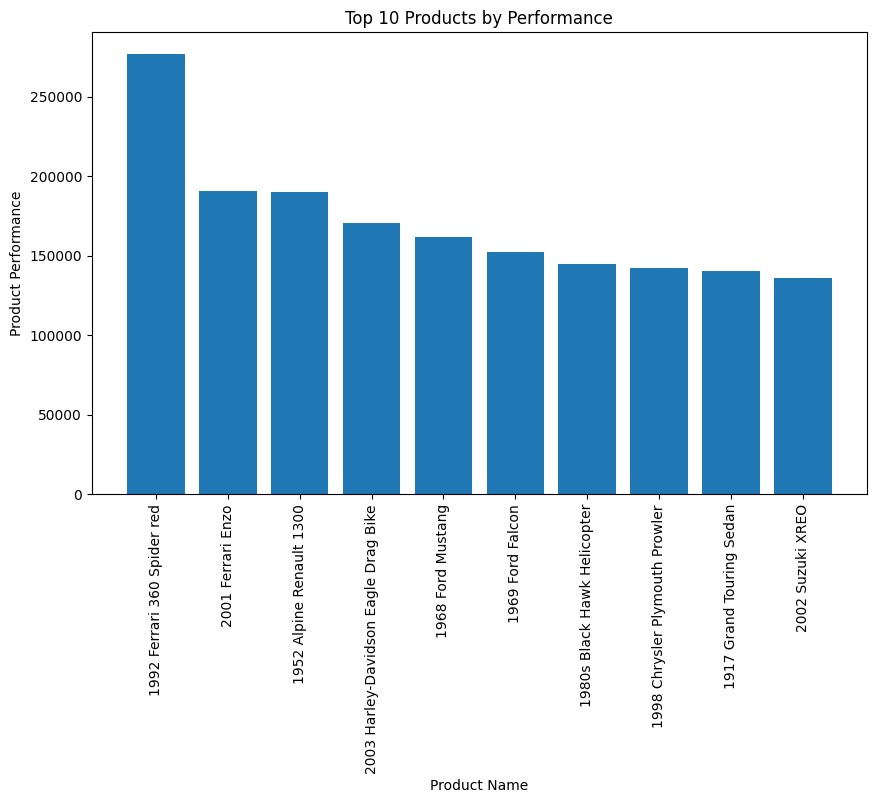

In [11]:
# To identify which product with highest performance
top_products = "SELECT P.productCode, P.productName, P.productLine, SUM(OD.quantityOrdered * OD.priceEach) AS productPerformance \
FROM products P \
JOIN orderDetails OD ON P.productCode = OD.productCode \
GROUP BY P.productCode, P.productName, P.productLine \
ORDER BY productPerformance DESC \
LIMIT 10;"

result = pd.read_sql_query(top_products, cnn)

# Display result
print(result)

# Visualize it
plt.figure(figsize=(10, 6))
plt.bar(result['productName'], result['productPerformance'])
plt.xlabel('Product Name')
plt.ylabel('Product Performance')
plt.title('Top 10 Products by Performance')
plt.xticks(rotation=90)
plt.show()

Classic Cars lead as the highest stock in terms of performance in sells


***** Q2: How should we match marketing and communication strategies to customer behavior? *****

In [ ]:
# P is products, OD os orderdetails, O is orders
# Compute profit
profit = "SELECT O.customerNumber, SUM(OD.quantityOrdered * (OD.priceEach - P.buyPrice)) AS profit \
FROM orders O \
JOIN orderDetails OD ON O.orderNumber = OD.orderNumber \
JOIN products P ON OD.productCode = P.productCode \
GROUP BY O.customerNumber;"

result = pd.read_sql_query(profit, cnn)

# Display result
print(result)

    customerNumber    profit
0              103  10063.80
1              112  31312.72
2              114  70311.07
3              119  60875.30
4              121  41391.52
..             ...       ...
93             486  33598.57
94             487  17230.12
95             489  10868.04
96             495  25244.69
97             496  51771.50

[98 rows x 2 columns]


In [ ]:
# Query below to identify top 5 VIP customers and top 5 as less customers who involved
# To indicate top 5 VIP customers
vip = "WITH customerProfit AS ( \
    SELECT O.customerNumber, SUM(OD.quantityOrdered * (OD.priceEach - P.buyPrice)) AS profit \
    FROM orders O \
    JOIN orderDetails OD ON O.orderNumber = OD.orderNumber \
    JOIN products P ON OD.productCode = P.productCode \
    GROUP BY O.customerNumber) \
SELECT C.contactLastName, C.contactFirstName, C.city, C.country, CP.profit \
FROM customers C \
JOIN customerProfit CP ON C.customerNumber = CP.customerNumber \
ORDER BY CP.profit DESC \
LIMIT 5"

result = pd.read_sql_query(vip, cnn)

# Display result
print(result)

  contactLastName contactFirstName        city    country     profit
0          Freyre           Diego       Madrid      Spain  326519.66
1          Nelson            Susan  San Rafael        USA  236769.39
2           Young             Jeff         NYC        USA   72370.09
3        Ferguson            Peter   Melbourne  Australia   70311.07
4         Labrune          Janine       Nantes     France   60875.30


In [ ]:
# To indicate top 5 less customers 
less_cust = "WITH customerProfit AS ( \
    SELECT O.customerNumber, SUM(OD.quantityOrdered * (OD.priceEach - P.buyPrice)) AS profit \
    FROM orders O \
    JOIN orderDetails OD ON O.orderNumber = OD.orderNumber \
    JOIN products P ON OD.productCode = P.productCode \
    GROUP BY O.customerNumber \
) \
SELECT C.contactLastName, C.contactFirstName, C.city, C.country, CP.profit \
FROM customers C \
JOIN customerProfit CP ON C.customerNumber = CP.customerNumber \
ORDER BY CP.profit ASC \
LIMIT 5;"

result = pd.read_sql_query(less_cust, cnn)

# Display result
print(result)

  contactLastName contactFirstName        city country    profit
0           Young             Mary    Glendale     USA   2610.87
1          Taylor           Leslie  Brickhaven     USA   6586.02
2         Ricotti           Franco       Milan   Italy   9532.93
3         Schmitt          Carine       Nantes  France  10063.80
4           Smith          Thomas       London      UK  10868.04


***** Q3: How Much Can We Spend on Acquiring New Customers? *****

In [ ]:
# Calculate customer profit average/customer LTV = 39039.5943877551
ltv_score = "WITH customerProfit AS ( \
    SELECT O.customerNumber, SUM(OD.quantityOrdered * (OD.priceEach - P.buyPrice)) AS profit \
    FROM orders O \
    JOIN orderDetails OD ON O.orderNumber = OD.orderNumber \
    JOIN products P ON OD.productCode = P.productCode \
    GROUP BY O.customerNumber \
) \
SELECT AVG(profit) AS averageProfit \
FROM customerProfit;"

result = pd.read_sql_query(ltv_score, cnn)

# Display result
print(result)

   averageProfit
0   39039.594388


In [ ]:
# Terminate Connection
cnn.close()

### **Conclusion**

Based on the information we get through analyzed data using these queries, we found that

1. Classic Cars are the top priority for restocking. They sell frequently and became the highest-performance products
2. We found that the top customers who gave their commit to these products, and that's very important, because with this information we can drive loyalty to attract and raise more awareness and also drive marketing strategies as well.
3. Calculate the Customer Lifetime Value (LTV) It tells us how much profit an average customer generates during their lifetime with our store, we use it the score to predict our future profit. We got 39039.594388 dollars and based on this finding we can decide predict on how much we can spend on acquiring customers.